# RQ1 How long it took developers to adopt safetensors after its first release?

Goal is to check when safetensors was first used in each studied repository.    

## Read the data first

In [4]:
from nb_utils import read_commits, SAFETENSORS_RELEASE_DATE

# frame listing model files per repository and commits as well as with the elapsed days between the commit and safetensor's release date
df = read_commits()

# Filter out rows with 'safetensors' serialization format
df_safetensors = df[df['serialization_format'] == 'safetensors']

# Group by elapsed days to count files modified on each date
files_modified_by_elapsed_days = df_safetensors['elapsed_days'].value_counts().sort_index()

# Group by date and count the number of files modified on that date
files_modified_by_date = df_safetensors['date'].value_counts().sort_index()

# find the lowest number of elapsed days per unique repo_url 
# (ie, when safetensors first appeared in each repo)
df_safetensors_first_appearance = df_safetensors.copy().groupby('repo_url')['elapsed_days'].min()
df_safetensors_first_appearance = df_safetensors_first_appearance.reset_index()

df_safetensors


# df_safetensors_first_appearance

,repo_url,commit_hash,model_file_path,serialization_format,date,message,elapsed_days
3,sentence-transformers/all-MiniLM-L6-v1,4ccf77db5049cc31b815180ea2d79ff4d4a1fccd,sentence-transformers/all-MiniLM-L6-v1/model.s...,safetensors,2024-03-27 05:40:56,Adding `safetensors` variant of this model (#3...,551
5,sentence-transformers/all-MiniLM-L12-v2,a05860a77cef7b37e0048a7864658139bc18a854,sentence-transformers/all-MiniLM-L12-v2/model....,safetensors,2024-03-26 10:05:34,Adding `safetensors` variant of this model (#8...,550
7,sentence-transformers/all-MiniLM-L12-v1,0845ca5ddc07524b3196519cf3940ceb86cf106c,sentence-transformers/all-MiniLM-L12-v1/model....,safetensors,2024-03-27 05:40:13,Adding `safetensors` variant of this model (#2...,551
9,sentence-transformers/LaBSE,50fe0940fa3ca3be4d2170f21395beb6d581fc44,sentence-transformers/LaBSE/2_Dense/model.safe...,safetensors,2024-03-27 05:39:35,Adding `safetensors` variant of this model (#6...,551
10,sentence-transformers/LaBSE,50fe0940fa3ca3be4d2170f21395beb6d581fc44,sentence-transformers/LaBSE/model.safetensors,safetensors,2024-03-27 05:39:35,Adding `safetensors` variant of this model (#6...,551
...,...,...,...,...,...,...,...
7558,T-Systems-onsite/cross-en-de-roberta-sentence-...,fb7dea62734262b9155eeaf0881ae177eaa7ceaf,T-Systems-onsite/cross-en-de-roberta-sentence-...,safetensors,2023-04-27 15:29:30,Adding `safetensors` variant of this model (#4...,216
7562,albert/albert-xlarge-v1,e9b59dbe40d22eb6ec042cf6af216207665f0320,albert/albert-xlarge-v1/model.safetensors,safetensors,2023-08-11 03:30:41,Adding `safetensors` variant of this model (#1...,322
7567,albert/albert-large-v2,1e2b86a91a3c63b5707d038747fb30838d9e7bac,albert/albert-large-v2/model.safetensors,safetensors,2023-04-06 09:41:50,Adding `safetensors` variant of this model (#2...,195
7576,albert/albert-base-v2,c3fcc1d2675a05929ea687d4ffbb537d1aa9c57a,albert/albert-base-v2/model.safetensors,safetensors,2023-04-06 09:39:39,Adding `safetensors` variant of this model (#2...,195


## Analysis 1: How many commits containing safetensors files were made by the SFconvertbot?

HuggingFace has a bot (https://huggingface.co/SFconvertbot) that converts models to safetensors.
How many commits were made by the bot and how many were made by developers themselves?
Hugging Face bot's source code: https://github.com/huggingface/safetensors/commits/main/bindings/python/convert.py

In [61]:
bot_message = "Adding `safetensors` variant of this model"
df_safetensors_not_by_bot = df_safetensors[~df_safetensors['message'].str.contains(bot_message)]
df_safetensors_by_bot = df_safetensors[df_safetensors['message'].str.contains(bot_message)]

num_commits = len(df['commit_hash'].unique())
num_safetensors_commits = len(df_safetensors['commit_hash'].unique())
num_safetensors_commits_by_bot = len(df_safetensors_by_bot['commit_hash'].unique())
num_safetensors_commits_not_by_bot = len(df_safetensors_not_by_bot['commit_hash'].unique())

print(f"# commits: {num_commits}")
print(f"# commits touching safetensor files: {num_safetensors_commits}")
print(f"% commits made by the bot: {num_safetensors_commits_by_bot / num_safetensors_commits * 100:.1f}% ({num_safetensors_commits_by_bot})")
print(f"% commits made by developers: {num_safetensors_commits_not_by_bot / num_safetensors_commits * 100:.1f}% ({num_safetensors_commits_not_by_bot})")


# commits: 4542
# commits touching safetensor files: 473
% commits made by the bot: 84.6% (400)
% commits made by developers: 15.4% (73)


## Analysis 2: Number of elapsed days since the release of safetensors


In [18]:
min = df_safetensors_first_appearance['elapsed_days'].min()
max = df_safetensors_first_appearance['elapsed_days'].max()
median = df_safetensors_first_appearance['elapsed_days'].median()
quartile2 = df_safetensors_first_appearance['elapsed_days'].quantile(0.25)
quartile4 = df_safetensors_first_appearance['elapsed_days'].quantile(0.75)
# count number of repos wihout safetensors
print("Number of analyzed repos: ", len(df['repo_url'].unique()))
print(f"Number of repos without safetensors: {len(df['repo_url'].unique()) - len(df_safetensors_first_appearance)}")
print("Number of repos using safe tensors", len(df_safetensors_first_appearance))
print("(min, quartile2, median, quartile4, max)",(min, quartile2, median, quartile4, max))



Number of analyzed repos:  1028
Number of repos without safetensors: 612
Number of repos using safe tensors 416
(min, quartile2, median, quartile4, max) (6, 224.0, 512.5, 551.0, 733)


## Analysis 3: Plot the number of adoptions per elapsed days

Since the first safetensors release, shows the number of model files using safetensors per elapsed days.

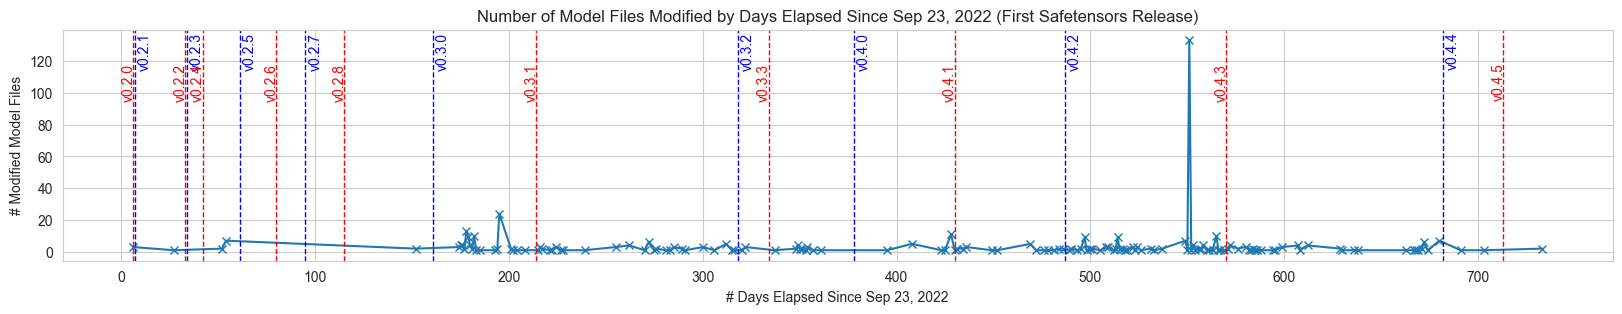

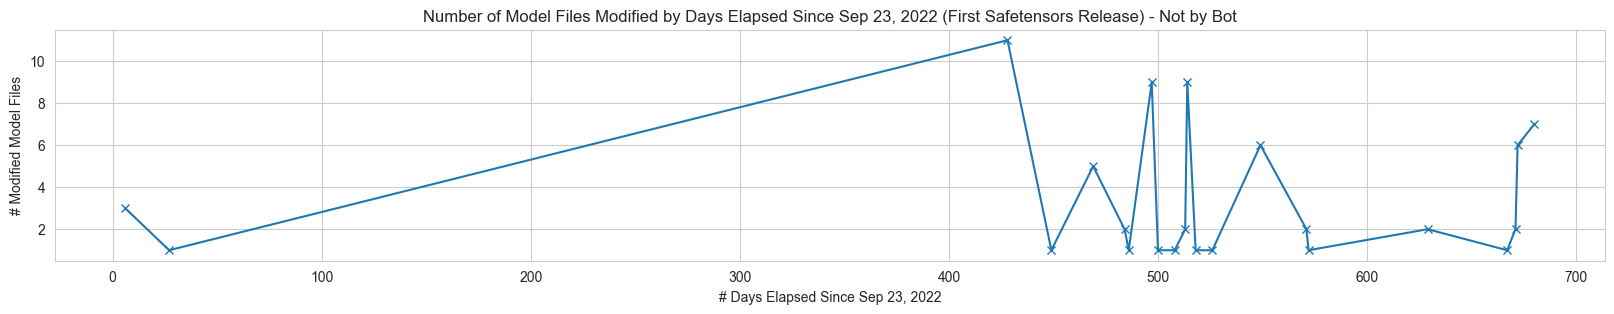

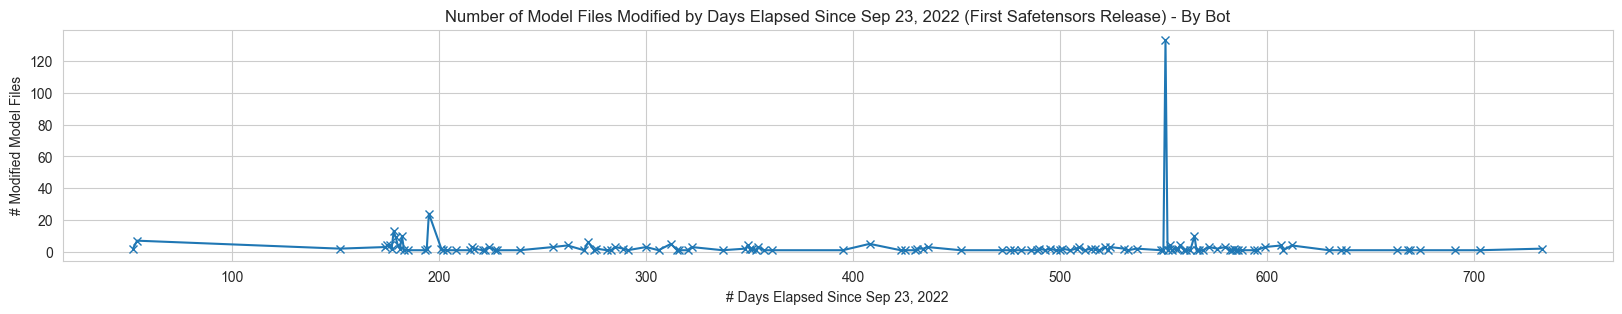

In [72]:
from pathlib import Path
import matplotlib.pyplot as plt
from nb_utils import get_safetensors_releases, SAFETENSORS_RELEASE_DATE



# Group by elapsed days to count files modified on each date

all_commits = df_safetensors['elapsed_days'].value_counts().sort_index()
commits_not_by_bot = df_safetensors_not_by_bot['elapsed_days'].value_counts().sort_index()
commits_by_bot = df_safetensors_by_bot['elapsed_days'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(20,3))
# plt.plot(commits_not_by_bot.index, commits_not_by_bot.values, marker='x', linestyle='-')
# plt.plot(commits_by_bot.index, commits_by_bot.values, marker='x', linestyle='-', color='black')
plt.plot(all_commits.index, all_commits.values, marker='x', linestyle='-')
plt.xlabel("# Days Elapsed Since Sep 23, 2022")
plt.ylabel("# Modified Model Files")
plt.title("Number of Model Files Modified by Days Elapsed Since Sep 23, 2022 (First Safetensors Release)")
plt.grid(True)


df_releases  = get_safetensors_releases()

#  add vertical lines for each release date with labels
colors = ['blue', 'red']
positions = [0.99, 0.85]
i = 0
x_coordinates = [1.5, -6]
for day, label in df_releases[['date', 'tag']].values:
    if label == 'v0.0.1': continue
    i = (i + 1) % 2
    diff = (day - SAFETENSORS_RELEASE_DATE).days
    plt.axvline(x=diff, color=colors[i], linestyle='--', linewidth=1)
    plt.text(diff + x_coordinates[i], plt.ylim()[1] * positions[i], label, color=colors[i], rotation=90, verticalalignment='top')
    

# Save the plot as a PDF file
plt.savefig(Path('../../results/RQ1SafetensorsAdoption.pdf'), format="pdf", bbox_inches="tight")

plt.show()

# create another plot with the not by bot data
plt.figure(figsize=(20,3))
plt.plot(commits_not_by_bot.index, commits_not_by_bot.values, marker='x', linestyle='-')
plt.xlabel("# Days Elapsed Since Sep 23, 2022")
plt.ylabel("# Modified Model Files")
plt.title("Number of Model Files Modified by Days Elapsed Since Sep 23, 2022 (First Safetensors Release) - Not by Bot")
plt.grid(True)
plt.show()

# create another plot with the by bot data but as subfigure
plt.figure(figsize=(20,3))
plt.plot(commits_by_bot.index, commits_by_bot.values, marker='x', linestyle='-')
plt.xlabel("# Days Elapsed Since Sep 23, 2022")
plt.ylabel("# Modified Model Files")
plt.title("Number of Model Files Modified by Days Elapsed Since Sep 23, 2022 (First Safetensors Release) - By Bot")
plt.grid(True)
plt.show()


